# Setup

In [1]:
import contracts
contracts.disable_all()

In [2]:
import duckietown_world as dw
from duckietown_world.svg_drawing.ipython_utils import ipython_draw_html
import geometry as g
import numpy as np
import networkx as nx
import copy

import sys
from duckietown_uplan.graph_utils.augmentation import GraphAugmenter

INFO:dt-world:duckietown-world 1.0.19
DEBUG:dt-serialization:Registering class Serializable
DEBUG:dt-serialization:Registering class GenericData
DEBUG:dt-serialization:Registering class Sequence
DEBUG:dt-serialization:Registering class SampledSequence
DEBUG:dt-serialization:Registering class Constant
DEBUG:dt-serialization:Registering class RectangularArea
DEBUG:dt-serialization:Registering class TransformSequence
DEBUG:dt-serialization:Registering class VariableTransformSequence
DEBUG:dt-serialization:Registering class SE2Transform
DEBUG:dt-serialization:Registering class Scale2D
DEBUG:dt-serialization:Registering class Matrix2D
DEBUG:dt-serialization:Registering class SpatialRelation
DEBUG:dt-serialization:Registering class GroundTruth
DEBUG:dt-serialization:Registering class PlacedObject
DEBUG:dt-serialization:Registering class EvaluatedMetric
DEBUG:dt-serialization:Registering class GenericObject
DEBUG:dt-serialization:Registering class Duckie
DEBUG:dt-serialization:Registering cla

In [3]:
dw.logger.setLevel(50)

Better visualization of output

In [4]:
%%html
<style>
pre {line-height: 90%}
</style>

# Road Network
Let's load a map and compute the road network.

In [5]:
m = dw.load_map('4way')


Use the function `get_skeleton_graph`:

In [6]:
sk = dw.get_skeleton_graph(m)

The return type is `SkeletonGraphResult`. It contains in `sk.root2` a new map with the joined lane segments. 

In [7]:
ipython_draw_html(sk.root2);

While in the attribute `sk.G` we find a graph describing the topology.

This is a graph where each node is a meeting point between lanes, and each edge represents a lane.

In [13]:
aug_graph = GraphAugmenter.augment_graph(sk.G, num_right = 2, num_left = 3, dist = 0.1)
GraphAugmenter.to_dict(aug_graph)

{0: {'center_node': 'P10_0',
  'dist2center': -0.30000000000000004,
  'inboundary': True,
  'index2center': -3,
  'inlane': False,
  'p': array([1.16999999, 0.42119998]),
  'point': SE2Transform([1.1699999570846558, 0.7211999773979187],-3.141592653589793),
  'theta': -3.141592653589793},
 1: {'center_node': 'P11_0',
  'dist2center': -0.30000000000000004,
  'inboundary': True,
  'index2center': -3,
  'inlane': False,
  'p': array([2.50379994, 1.16999999]),
  'point': SE2Transform([2.203799915313721, 1.1699999570846558],-1.5707963267948968),
  'theta': -1.5707963267948968},
 2: {'center_node': 'P29_0',
  'dist2center': 0.2,
  'inboundary': False,
  'index2center': 2,
  'inlane': False,
  'p': array([1.75499997, 2.50379994]),
  'point': SE2Transform([1.7549999952316284, 2.703799915313721],-5.483473520817574e-24),
  'theta': -5.48347336291733e-24},
 3: {'center_node': 'P9_0',
  'dist2center': 0,
  'inboundary': True,
  'index2center': 0,
  'inlane': True,
  'p': array([1.16999999, 0.163799

Let's bring in the `draw_graph` function from some time ago.

In [9]:
def draw_graph(G0, pos=None):
    import networkx as nx
    from matplotlib import pyplot as plt
    pos = pos or nx.spring_layout(G0)
    plt.figure(figsize=(12, 12))    
    nx.draw(G0,pos,labels={}, node_size=10) # node:node for node in G0.nodes()
    nx.draw_networkx_edge_labels(G0,pos,edge_labels={},font_color='red')
    plt.axis('off')
    plt.show()

Set the position of each node in the graph based on the attribute 'point'.

In [10]:
%matplotlib inline

In [11]:
aug_graph.nodes["P10_1"]["point"].theta

-3.141592653589793

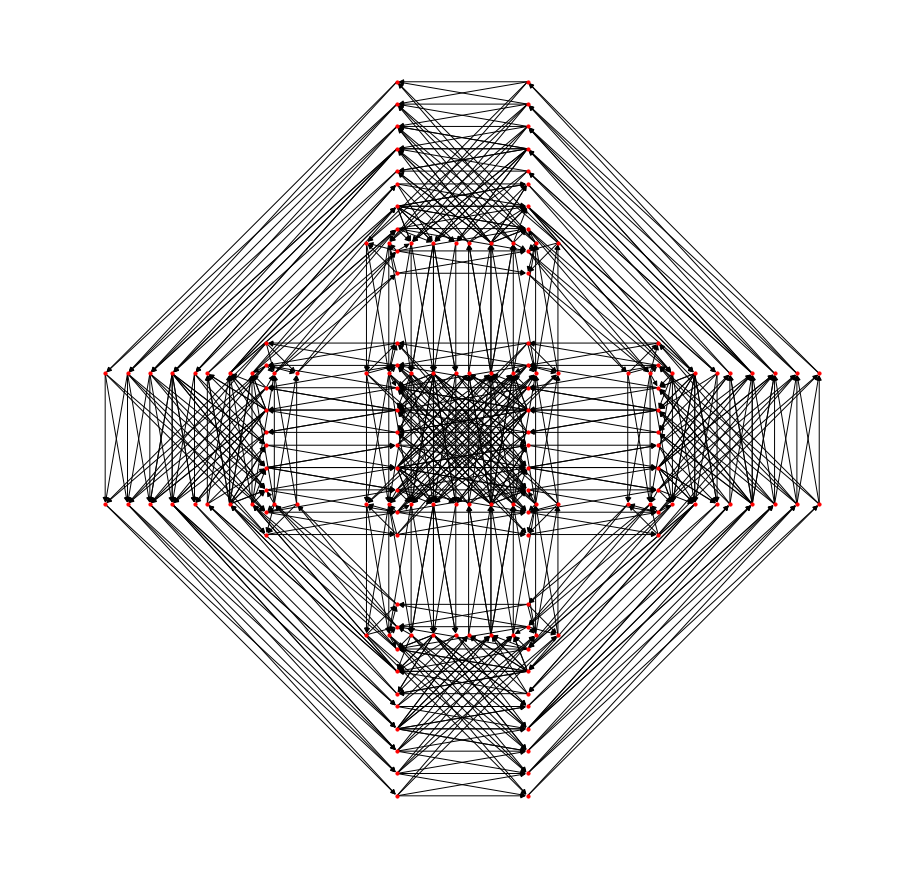

In [12]:
import geometry as geo
pos = {}
for n in aug_graph:
    q = aug_graph.nodes[n]['point'].as_SE2()
    t, _ = geo.translation_angle_from_SE2(q)
    pos[n] = t
draw_graph(aug_graph, pos=pos)